<a href="https://colab.research.google.com/github/NonKhuna/Depression-classification/blob/main/depression_indiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

## Download dataset

In [ ]:
!gdown 1DRAz1xOz-liOenuQY86oeWVqsNlwqJaG

Downloading...
From: https://drive.google.com/uc?id=1DRAz1xOz-liOenuQY86oeWVqsNlwqJaG
To: /content/participant_txt_df_all_Concentrating (1).csv
100% 255k/255k [00:00<00:00, 103MB/s]


In [ ]:
# Dattaset from kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d infamouscoder/depression-reddit-cleaned
!unzip /content/depression-reddit-cleaned.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/979k [00:00<?, ?B/s]
100% 979k/979k [00:00<00:00, 162MB/s]
Archive:  /content/depression-reddit-cleaned.zip
  inflating: depression_dataset_reddit_cleaned.csv  


## Load DataFrame

### Dataset 1 from indiv (be Test set)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("participant_txt_df_all_Concentrating (1).csv")

In [ ]:
df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.lower()
df.head()

,Participant_ID,text,isDepressed,target
0,302,im fine how about yourself im from los angeles...,0,0
1,307,laughter um moscow um my family moved to the u...,0,0
2,331,yes okay connecticut um to be an actor laughte...,0,1
3,335,yes im okay uh im from here originally los ang...,1,1
4,346,yes im okay here in los angeles theres a lot o...,1,3


In [ ]:
df.shape

(34, 4)

In [ ]:
l = df['text'].str.len()
l.mean(), l.max(), l.min()

(7502.5, 14425, 2235)

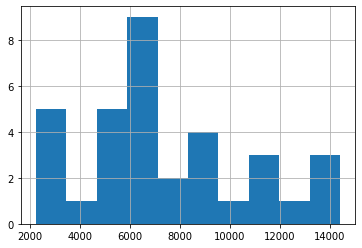

In [ ]:
l.hist()

In [ ]:
df['isDepressed'].value_counts()

0    22
1    12
Name: isDepressed, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
X = df['text']
y = df['isDepressed']
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=14)
X.shape, y.shape

((34,), (34,))

### Dataset 2 from kaggle Depression: Reddit Dataset (Cleaned)


In [ ]:
import pandas as pd
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")
df['clean_text'] = df['clean_text'].str.strip()
df['clean_text'] = df['clean_text'].str.lower()
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df['is_depression'].value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
X= df['clean_text']
y = df['is_depression']
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=14)
X_train.shape, y_train.shape

((6184,), (6184,))

# Model

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 31.5 MB/s 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# from pythainlp import word_tokenize
from nltk import word_tokenize

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Test Word tokenize

In [ ]:
# set stopword
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

def tokenizer(t):
  token = word_tokenize(t)
  # token = [t for t in token if not t.lower() in stop_words]
  return token
  # # Normalization part
  # wordnet_lemmatizer = WordNetLemmatizer()
  # lemma_word = []
  # for w in token:
  #   word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
  #   word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
  #   word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
  #   lemma_word.append(word3)
  # return lemma_word

In [ ]:
a1 = tokenizer(X_train[0])
a2 = word_tokenize(X_train[0])

NameError: ignored

## Model 1 N-gram + Naive Bayes

In [ ]:
count_vec = CountVectorizer(
    ngram_range = (1,2),
    tokenizer=tokenizer,
    min_df = 3,
    max_df=0.9
)
model_nb = MultinomialNB()

In [ ]:
train_count = count_vec.fit_transform(X_train)
test_count = count_vec.transform(X_test)

In [ ]:
model_nb.fit(train_count, y_train)

MultinomialNB()

In [ ]:
# print(classification_report(y_test, test_predict, digits=3))

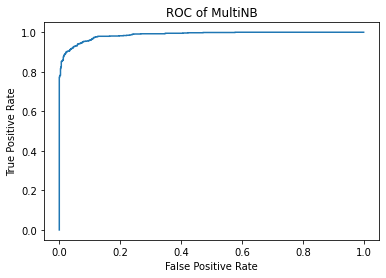

In [ ]:
Y_mnb_score = model_nb.predict_proba(test_count)
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test, Y_mnb_score[:, 1])
plt.plot(fpr_mnb, tpr_mnb)
plt.title("ROC of MultiNB")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

cross_validation(model_nb, count_vec.fit_transform(X), y, _cv=5)

{'Training Accuracy scores': array([0.94243208, 0.94405821, 0.94195635, 0.93759095, 0.93532741]),
 'Mean Training Accuracy': 94.02729969954017,
 'Training Precision scores': array([0.90538922, 0.90740186, 0.90315852, 0.8987794 , 0.90147635]),
 'Mean Training Precision': 0.9032410696982838,
 'Training Recall scores': array([0.98694517, 0.98792822, 0.98890701, 0.98499184, 0.97618271]),
 'Mean Training Recall': 0.9849909915282031,
 'Training F1 scores': array([0.94440974, 0.94595439, 0.94408971, 0.93991283, 0.93734336]),
 'Mean Training F1 Score': 0.9423420048223715,
 'Validation Accuracy scores': array([0.87976729, 0.88939198, 0.885511  , 0.89068564, 0.78460543]),
 'Mean Validation Accuracy': 86.59922681382236,
 'Validation Precision scores': array([0.81003202, 0.82800441, 0.8239824 , 0.84036488, 0.79217274]),
 'Mean Validation Precision': 0.8189112890547496,
 'Validation Recall scores': array([0.98956975, 0.98041775, 0.97780679, 0.96214099, 0.76631854]),
 'Mean Validation Recall': 0.935

In [ ]:
auc = roc_auc_score(y_test, Y_mnb_score[:, 1])
print('AUC: %.3f' % auc)

AUC: 0.987


### 5-fold cross-validation


In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np
def cross_validation_roc(model, _x, _y, _cv=5) :
  kfold = StratifiedKFold(n_splits=_cv).split(_x,_y)
  score = []
  y_test_all = []
  avg_all = []
  for k, (train,test) in enumerate(kfold):
    model_c =  clone(model)
    model_c.fit(_x[train], _y[train])
    y_score = model_c.predict_proba(_x[test])

    re_score = model_c.predict(_x[test])
    y_test_all.extend(_y[test])
    score.extend(y_score[:,1])

  fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test_all, score)
  plt.plot(fpr_mnb, tpr_mnb)
  plt.title("ROC of MultiNB")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  auc = roc_auc_score(y_test_all, score)
  print('Amount of test:', len(y_test_all))
  print('AUC: %.3f' % auc)
  # return fpr_mnb, tpr_mnb, thresholds_mnb
# cross_validation_roc(model_nb, X_count, y, _cv=5)

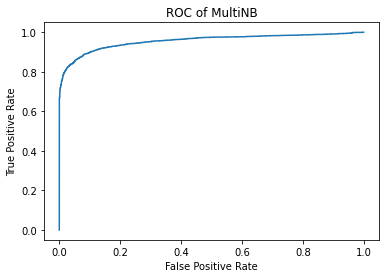

Amount of test: 7731
AUC: 0.956


{'Training Accuracy scores': array([0.94243208, 0.94405821, 0.94195635, 0.93759095, 0.93532741]),
 'Mean Training Accuracy': 94.02729969954017,
 'Training Precision scores': array([0.90538922, 0.90740186, 0.90315852, 0.8987794 , 0.90147635]),
 'Mean Training Precision': 0.9032410696982838,
 'Training Recall scores': array([0.98694517, 0.98792822, 0.98890701, 0.98499184, 0.97618271]),
 'Mean Training Recall': 0.9849909915282031,
 'Training F1 scores': array([0.94440974, 0.94595439, 0.94408971, 0.93991283, 0.93734336]),
 'Mean Training F1 Score': 0.9423420048223715,
 'Validation Accuracy scores': array([0.87976729, 0.88939198, 0.885511  , 0.89068564, 0.78460543]),
 'Mean Validation Accuracy': 86.59922681382236,
 'Validation Precision scores': array([0.81003202, 0.82800441, 0.8239824 , 0.84036488, 0.79217274]),
 'Mean Validation Precision': 0.8189112890547496,
 'Validation Recall scores': array([0.98956975, 0.98041775, 0.97780679, 0.96214099, 0.76631854]),
 'Mean Validation Recall': 0.935

In [ ]:
count_vec = CountVectorizer(
    ngram_range = (1,2),
    tokenizer=tokenizer,
    min_df = 3,
    max_df=0.9
)
model_nb = MultinomialNB()
X_count = count_vec.fit_transform(X)
cross_validation_roc(model_nb, X_count, y, _cv=5)
cross_validation(model_nb, X_count, y, _cv=5)

## Model 2: TF-IDF(n-gram) + Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1,2),       # Use unigram and bigram
    tokenizer=tokenizer, # Use `word_tokenize` method from pythainlp for tokenizer
    min_df=2,                # The word found less than three times in dataset is ignored
    max_df=0.9,              # The word found more than 90% of entries is ignore
    use_idf=True,
    smooth_idf=True, 
    sublinear_tf=True
)
# Logistic regresstion
model = LogisticRegression(C=1, max_iter=300, random_state=42)

In [ ]:
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)

In [ ]:
# Visualize extracted feature
i = 4
# sentence at index i
print("Sentence: ", X_train[i])
# Explore all features with count
feature_list = tfidf.get_feature_names()
print("Feature" + "\t\t" + "TF-IDF")
for indice, value in zip(train_tfidf[i].indices, train_tfidf[i].data):
  tap = "\t\t"
  if len(feature_list[indice]) > 7:
    tap = "\t"
  print('"' + feature_list[indice] + '"' + tap + str(value))

In [ ]:
model.fit(train_tfidf, y_train)

LogisticRegression(C=1, max_iter=300, random_state=42)

In [ ]:
test_predict = model.predict(test_tfidf)

In [ ]:
print("logistic \n", classification_report(y_test, test_predict, digits=3))

logistic 
               precision    recall  f1-score   support

           0      0.936     0.974     0.954       763
           1      0.973     0.935     0.954       784

    accuracy                          0.954      1547
   macro avg      0.955     0.954     0.954      1547
weighted avg      0.955     0.954     0.954      1547



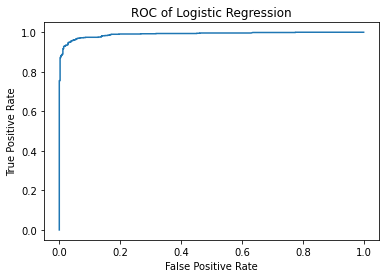

Amount of test: 1547
AUC: 0.990


In [ ]:
Y_logist = model.decision_function(test_tfidf)
fpr, tpr, thresholds= roc_curve(y_test, Y_logist)
plt.plot(fpr, tpr)
plt.title("ROC of Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, Y_logist)
print('Amount of test:', len(y_test))
print('AUC: %.3f' % auc)

### 5-fold cross-validation 

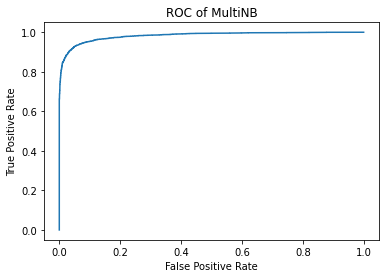

Amount of test: 7731
AUC: 0.983


{'Training Accuracy scores': array([0.97962484, 0.98059822, 0.98124495, 0.97833468, 0.96701698]),
 'Mean Training Accuracy': 97.73639328969536,
 'Training Precision scores': array([0.99527984, 0.99696254, 0.99663186, 0.99593909, 0.99515403]),
 'Mean Training Precision': 0.9959934715091551,
 'Training Recall scores': array([0.96344648, 0.96378467, 0.96541599, 0.96019576, 0.93800979]),
 'Mean Training Recall': 0.958170534843406,
 'Training F1 scores': array([0.97910448, 0.9800929 , 0.9807756 , 0.97774086, 0.96573732]),
 'Mean Training F1 Score': 0.9766902331109779,
 'Validation Accuracy scores': array([0.96121526, 0.95278137, 0.94566624, 0.94566624, 0.78654592]),
 'Mean Validation Accuracy': 91.83750044947823,
 'Validation Precision scores': array([0.98491084, 0.98461538, 0.99277457, 0.98853868, 0.98017621]),
 'Mean Validation Precision': 0.9862031362508461,
 'Validation Recall scores': array([0.93611473, 0.91906005, 0.89686684, 0.90078329, 0.58093995]),
 'Mean Validation Recall': 0.8467

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1,2),       # Use unigram and bigram
    tokenizer=tokenizer, # Use `word_tokenize` method from pythainlp for tokenizer
    min_df=2,                # The word found less than three times in dataset is ignored
    max_df=0.9,              # The word found more than 90% of entries is ignore
    use_idf=True,
    smooth_idf=True, 
    sublinear_tf=True
)
# Logistic regresstion
model = LogisticRegression(C=1, max_iter=300, random_state=42)
X_count = tfidf.fit_transform(X)
cross_validation_roc(model, X_count, y, _cv=5)
cross_validation(model, X_count, y, _cv=5)

In [ ]:

cross_validation(model, count_vec.fit_transform(X), y, _cv=5)

## Model 3: NB-SVM

In [ ]:
from sklearn import svm
import numpy as np

In [ ]:
def pr(y_i, y, train_count):
  """Calculate probability of class y_i"""
  alpha = 1
  p = train_count[y==y_i].sum(0)
  return (p + alpha) / (p + alpha).sum()

def get_mdl_nbsvm(y, train_count):
    """Train model for each label"""
    r = np.log(pr(1, y, train_count) / pr(0, y, train_count)) #log-count ratio
    x_nb = train_count.multiply(r) #tf * r
    m = svm.SVC(gamma='scale', probability=True)
    return m.fit(x_nb, y), r
    
def one_hot(labels, unique_labels):
  """Create dummy code from label"""
  output = []
  for label in unique_labels:
    np_train_labels = np.array(labels)
    output.append((np_train_labels == label).astype(int))
  output = np.array(output)
  return output

In [ ]:
count_vec = CountVectorizer(
    ngram_range=(1,2),       # Use unigram and bigram
    tokenizer=word_tokenize, # Use `word_tokenize` method from pythainlp for tokenizer
    min_df=3,                # The word found less than three times in dataset is ignored
    max_df=0.9,              # The word found more than 90% of entries is ignore
)

train_count = count_vec.fit_transform(X_train)
test_count = count_vec.transform(X_test)

In [ ]:
unique_labels = set(y_test)
index_to_label = [label for label in unique_labels]
label_to_index = {label:i for i, label in enumerate(unique_labels)}

onehot_train_labels = one_hot(y_train, unique_labels)
onehot_test_labels = one_hot(y_test, unique_labels)

In [ ]:
# Init zero array (number of entries X number of unique labels])
preds = np.zeros((len(X_test), len(unique_labels)))
# models and log ratios for each label
models = []
ratios = []
# Loop each label to train the model separately and predict each label
for i, label in enumerate(unique_labels):
    print('fit', label)
    # Train model
    m, r = get_mdl_nbsvm(onehot_train_labels[i], train_count)
    # Store model and log ratio for each label
    models.append(m)
    ratios.append(r)
    # Multiply calculated log ratio to the feature
    normalized_feature = test_count.multiply(r)
    # Predict and get the prob
    preds[:,i] = m.predict_proba(normalized_feature)[:,1]

fit 0
fit 1


In [ ]:
preds

array([[0.92144416, 0.0757264 ],
       [0.72399522, 0.27256209],
       [0.44485116, 0.55597482],
       [0.87643067, 0.12016776],
       [0.95909937, 0.04017981],
       [0.7235714 , 0.27304842],
       [0.69256899, 0.30428538]])

In [ ]:
# Get the label that have the best score on prediction
test_predict_indices = np.argmax(preds, axis=1)
test_predict = [ index_to_label[pred_ind] for pred_ind in test_predict_indices]

In [ ]:
print(classification_report(y_test, test_predict, digits=3))

              precision    recall  f1-score   support

           0      0.936     0.993     0.964       763
           1      0.993     0.934     0.963       784

    accuracy                          0.963      1547
   macro avg      0.965     0.964     0.963      1547
weighted avg      0.965     0.963     0.963      1547



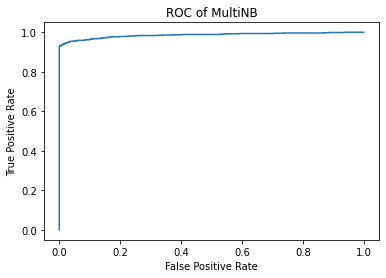

AUC: 0.986


In [ ]:
Y_mnb_score = preds
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test, Y_mnb_score[:, 1])
plt.plot(fpr_mnb, tpr_mnb)
plt.title("ROC of MultiNB")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, Y_mnb_score[:, 1])
print('AUC: %.3f' % auc)

### 5-fold cross-validation

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.base import clone
from sklearn import svm
import numpy as np

def cross_validation_roc_nb_svm(_x, _y, _cv=5) :
  kfold = StratifiedKFold(n_splits=_cv).split(_x,_y)
  unique_labels = set(_y)
  index_to_label = [label for label in unique_labels]
  label_to_index = {label:i for i, label in enumerate(unique_labels)}

  score = []
  y_test_all = []
  accuracy_vals = []
  f1_s = []
  for k, (train,test) in enumerate(kfold):
    count_vec = CountVectorizer(
      ngram_range=(1,2),       # Use unigram and bigram
      tokenizer=word_tokenize, # Use `word_tokenize` method from pythainlp for tokenizer
      min_df=3,                # The word found less than three times in dataset is ignored
      max_df=0.9,              # The word found more than 90% of entries is ignore
    )

    train_count = count_vec.fit_transform(_x[train])
    test_count = count_vec.transform(_x[test])

    onehot_train_labels = one_hot(_y[train], unique_labels)
    onehot_test_labels = one_hot(_y[test], unique_labels)
    # print("this", len(test))
    # Init zero array (number of entries X number of unique labels])
    preds = np.zeros((len(test), len(unique_labels)))
    # models and log ratios for each label
    
    models = []
    ratios = []
    
    # Loop each label to train the model separately and predict each label
    for i, label in enumerate(unique_labels):
        # print('fit', label)
        # Train model
        m, r = get_mdl_nbsvm(onehot_train_labels[i], train_count)
        # Store model and log ratio for each label
        models.append(m)
        ratios.append(r)
        # Multiply calculated log ratio to the feature
        normalized_feature = test_count.multiply(r)
        # Predict and get the prob
        preds[:,i] = m.predict_proba(normalized_feature)[:,1]
    predicted = (preds[:,1] >= 0.5).astype(int)
    acc = sum(_y[test] == predicted)/len(test)

    accuracy_vals.append(acc)
    f1_s.append(f1_score(_y[test],predicted))
    y_test_all.extend(_y[test])
    score.extend(preds[:,1])

  fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test_all, score)
  plt.plot(fpr_mnb, tpr_mnb)
  plt.title("ROC of NB-SVM")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  auc = roc_auc_score(y_test_all, score)
  accuracy_vals = np.array(accuracy_vals)
  f1_s = np.array(f1_s)
  print('Amount of test:', len(y_test_all))
  print('AUC: %.3f' % auc)
  print('acc mean: ', accuracy_vals.mean())
  print('f1_s mean ', f1_s.mean())
  # return fpr_mnb, tpr_mnb, thresholds_mnb
# cross_validation_roc(model_nb, X_count, y, _cv=5)

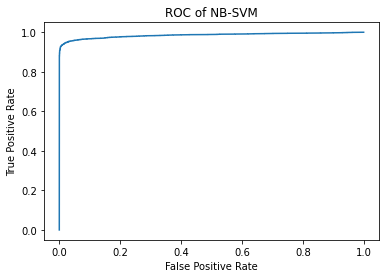

Amount of test: 7731
AUC: 0.985
acc mean:  0.9633934895482723
f1_s mean  0.9619799592215628


In [ ]:
count_vec = CountVectorizer(
    ngram_range=(1,2),       # Use unigram and bigram
    tokenizer=word_tokenize, # Use `word_tokenize` method from pythainlp for tokenizer
    min_df=3,                # The word found less than three times in dataset is ignored
    max_df=0.9,              # The word found more than 90% of entries is ignore
)

train_count = count_vec.fit_transform(X)
cross_validation_roc_nb_svm(X, y, _cv=5)


## Model 4: bert

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.9 MB/s 
     |████████████████████████████████| 182 kB 75.0 MB/s 
     |████████████████████████████████| 7.6 MB 62.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 28.7 MB/s 
     |████████████████████████████████| 132 kB 70.1 MB/s 
     |████████████████████████████████| 212 kB 74.0 MB/s 
     |████████████████████████████████| 127 kB 77.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from datasets import Dataset
from datasets import load_metric

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [ ]:
train_d = pd.DataFrame({"text":X_train, "lebel":y_train})
test_d = pd.DataFrame({"text":X_test, "lebel":y_test})
train = Dataset.from_pandas(train_d, preserve_index=False)
validation = Dataset.from_pandas(test_d, preserve_index=False)

print(train)
print(validation)

Dataset({
    features: ['text', 'lebel'],
    num_rows: 27
})
Dataset({
    features: ['text', 'lebel'],
    num_rows: 7
})


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

tokenized_train_dataset = train.map(tokenize_function, batched=True)
tokenized_test_dataset = validation.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")   # default arguments for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=2)  # overwriting MLM roberta-base for sequence binary classification

def compute_metrics(eval_preds):   # compute accuracy and f1-score
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(   # specifying trainer class
    model,
    training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()  # starts fine-tuning

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "inter